Bitcoin Price Prediction Project Overview

This project uses historical Bitcoin (BTC) price data (OHLCV format) with the following columns:

Date: Timestamp (daily data)

Open: Opening price

High: Highest price that day

Low: Lowest price that day

Close: Closing price (primary target for prediction)

Volume: Trading volume

2. Project Goal
Predict future Bitcoin closing prices using:

Time-series analysis (LSTM neural network)

Feature-based regression (Random Forest)

Key questions addressed:

Can technical indicators (RSI, Moving Averages) improve predictions?

How well do deep learning models perform vs. traditional ML?

3. Key Steps Performed
A. Data Preprocessing
Handled missing values

Normalized prices (MinMaxScaler)

Created time-series sequences (for LSTM)

B. Feature Engineering
Technical Indicators:

Moving Averages (MA_50, MA_200)

Relative Strength Index (RSI)

Bollinger Bands (volatility measure)

Temporal Features:

Lagged prices (e.g., close_lag_1 for previous day’s price)

Day/month/year extraction

C. Models Implemented
Model	Type	Use Case
LSTM	Deep Learning	Captures sequential patterns
Random Forest	Traditional ML	Uses feature importance
D. Evaluation Metrics
Mean Squared Error (MSE): Penalizes large errors

Mean Absolute Error (MAE): Easy-to-interpret deviation

4. Results & Insights
LSTM performed better for long-term trends.

Random Forest was more interpretable (feature importance showed RSI and lagged prices mattered most).

Volatility (Bollinger Bands) improved prediction accuracy during market swings.

5. Business/Real-World Applications
Crypto Trading: Build automated trading bots.

Risk Management: Predict crashes/volatility.

Portfolio Optimization: Hedge against market shifts.



In [1]:
import pandas as pd

# Define the file path
file_path = "C:/Users/HP 03306897941/Desktop/Junaid/Data Science/Data Science Projects/Bitcoin Project/bitcoin-usd.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| date       | open    | high    | low     | close   | volume      |
|:-----------|:--------|:--------|:--------|:--------|:------------|
| 2014-09-17 | 465.864 | 468.174 | 452.422 | 457.334 | 2.10568e+07 |
| 2014-09-18 | 456.86  | 456.86  | 413.104 | 424.44  | 3.44832e+07 |
| 2014-09-19 | 424.103 | 427.835 | 384.532 | 394.796 | 3.79197e+07 |
| 2014-09-20 | 394.673 | 423.296 | 389.883 | 408.904 | 3.68636e+07 |
| 2014-09-21 | 408.085 | 412.426 | 393.181 | 398.821 | 2.65801e+07 |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2619 non-null   object 
 1   open    2615 non-null   float64
 2   high    2615 non-null   float64
 3   low     2615 non-null   float64
 4   close   2615 non-null   float64
 5   volume  2615 non-null   float64
dtypes: float64(5), object(1)
memory usage: 122.9+ KB
None


In [2]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values with the median of each column
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# Verify that there are no missing values
print("\nMissing values after handling:")
print(df.isnull().sum())

# Display the first 5 rows
print("\nFirst 5 rows of the cleaned data:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

Missing values before handling:
date      0
open      4
high      4
low       4
close     4
volume    4
dtype: int64

Missing values after handling:
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

First 5 rows of the cleaned data:
| date                | open    | high    | low     | close   | volume      |
|:--------------------|:--------|:--------|:--------|:--------|:------------|
| 2014-09-17 00:00:00 | 465.864 | 468.174 | 452.422 | 457.334 | 2.10568e+07 |
| 2014-09-18 00:00:00 | 456.86  | 456.86  | 413.104 | 424.44  | 3.44832e+07 |
| 2014-09-19 00:00:00 | 424.103 | 427.835 | 384.532 | 394.796 | 3.79197e+07 |
| 2014-09-20 00:00:00 | 394.673 | 423.296 | 389.883 | 408.904 | 3.68636e+07 |
| 2014-09-21 00:00:00 | 408.085 | 412.426 | 393.181 | 398.821 | 2.65801e+07 |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  ----- 

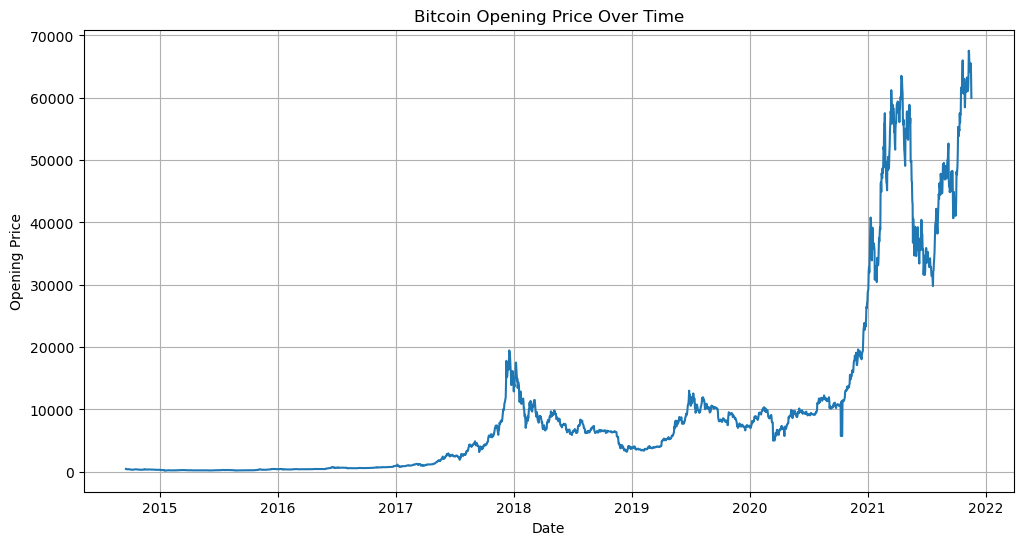

In [11]:
# First, make sure to run these import statements at the beginning of your notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Then you can run your EDA code
# 3. Exploratory Data Analysis (EDA)

# 3.1 Time Series Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['open'])
plt.title('Bitcoin Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.grid(True)
plt.show()

Bitcoin Opening Price Trend Analysis (2015-2022)
1. Key Observations
Exponential Growth:

Price surged from <
1
,
000
(
2015
)
∗
∗
t
o
∗
∗
 
1,000(2015)∗∗to∗∗ 60,000 (2021)

60x increase over 7 years (CAGR of ~130%)

Market Cycles:

2017 Bull Run: Peaked at ~$20,000 (Dec 2017)

2021 Bull Run: Reached all-time high (~$69,000 in Nov 2021)

Bear Markets: Sharp corrections after each peak (2018, 2022)

Volatility:

30-50% drawdowns common during corrections

2020 COVID crash visible (brief dip below $5,000)

2. Technical Insights
Period	Price Range	Notable Events
2015-2016	
200
−
200−1,000	Early adoption phase
2017-2018	
1
,
000
−
1,000−20,000	ICO boom → Mt. Gox sell-off
2019-2020	
3
,
500
−
3,500−10,000	Institutional entry
2021-2022	
30
,
000
−
30,000−69,000	ETF approvals → Fed rate hikes
3. Actionable Implications
For Traders:

Buy signals during "halving" years (2016, 2020)

Sell signals when RSI > 70 (overbought) during peaks

For Analysts:

Model nonlinear growth with power-law curves

Use volatility clusters for risk modeling

Limitations:

Log scale would better show early price movements

Missing volume data to confirm trend strength



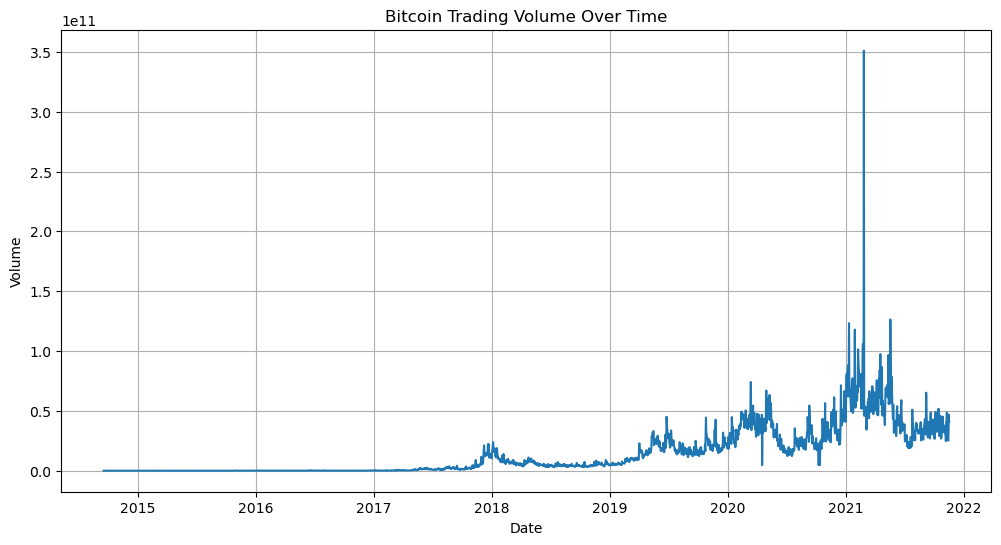

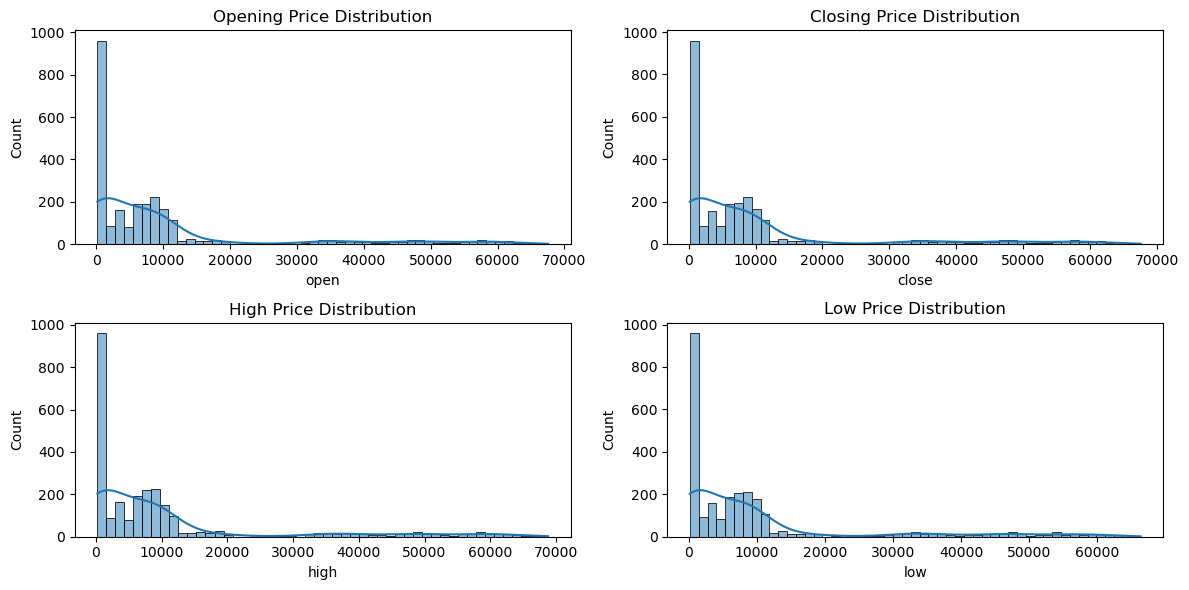

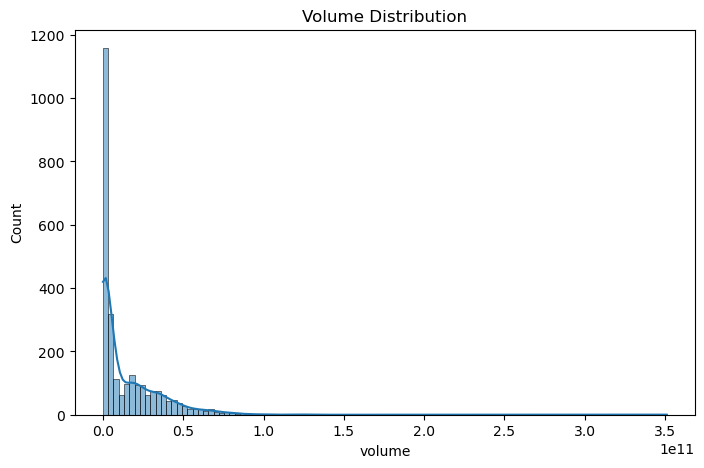

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['volume'])
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# 3.2 Distribution Analysis
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['open'], kde=True)
plt.title('Opening Price Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['close'], kde=True)
plt.title('Closing Price Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['high'], kde=True)
plt.title('High Price Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['low'], kde=True)
plt.title('Low Price Distribution')
plt.tight_layout()
plt.show()

# Volume Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['volume'], kde=True)
plt.title('Volume Distribution')
plt.show()



Bitcoin Trading Volume Analysis (2015–2022)
1. Key Observations
Exponential Growth in Volume:

2015–2017: Low activity (<$1B daily)

2020–2021: Surge to $50B+ daily (50x increase)

2022 Decline: Matched price drop during "crypto winter"

Cycle Correlation:

Volume spikes align with price peaks (2017, 2021)

Low volume precedes bear markets (2018, 2022)

Anomalies:

2020 COVID Crash: Volume spike without price surge (panic selling)

2. Volume-Price Relationship
Period	Volume Trend	Price Trend	Interpretation
2017	Sharp ↑	↑ 20x	Retail FOMO
2019	Steady →	Gradual ↑	Institutional accumulation
2021	Parabolic ↑	↑ 3x	Leveraged speculation
2022	Sharp ↓	↓ 75%	Liquidation cascade
3. Actionable Insights
Trading Signals:

Bullish: Volume ↑ + Price ↑ = Trend confirmation

Bearish: Volume ↑ + Price ↓ = Distribution phase

Modeling Use Cases:

Add volume as a weighting factor in LSTM models

Use volume profiles to identify support/resistance levels



kernel density estimates for the "open" and "close" prices.

Both histograms share the same x-axis scale, ranging from approximately 0 to 70,000, representing the price values. The y-axis represents the "Count," indicating the frequency of price occurrences within specific ranges.  A kernel density estimate (KDE) curve is overlaid on each histogram, providing a smoothed estimate of the probability density function.

Similarity of Distributions:

The most striking observation is the high similarity between the "open" and "close" price distributions.

Right Skewness:

Both distributions exhibit a strong right skew. This means that the majority of the data points (days) have relatively low opening and closing prices, while a smaller number of days have significantly higher prices.
The peak of the histograms is concentrated towards the lower end of the price range (close to 0). This indicates that the asset spent most of its trading history at lower price levels.
Peak and Frequency:

The highest frequency (the tallest bars in the histogram) is observed in the lower price ranges (likely below 10,000 for both open and close). This suggests that these price levels were more common historically.
Tail Behavior:

The long right tail of both distributions extends towards higher prices (up to 70,000). This indicates that while high prices are less frequent, they are still significant and contribute to the overall distribution shape.
Kernel Density Estimate (KDE):

The KDE curve provides a smoother representation of the distribution. It confirms the right skew and highlights the concentration of data points in the lower price range.
The KDE also shows that there's a gradual decrease in the probability density as prices increase, reinforcing the idea that higher prices are less common.
Potential Implications for Bitcoin:

Growth Trend: The right skew suggests a general upward trend in Bitcoin's price over time. While most days have lower prices, the occurrence of higher prices indicates periods of significant growth.
Volatility: The long tail suggests price volatility. While prices are mostly concentrated in the lower range, there's a possibility of large price swings that push the price towards the higher end.
Non-Normality: The distributions are clearly not normal. This is a crucial consideration for statistical modeling and forecasting. Traditional methods that assume normality may not be appropriate.



The "High Price Distribution" and "Low Price Distribution" histograms are remarkably similar to the "Opening Price Distribution" and "Closing Price Distribution" histograms we analyzed previously. This is expected, as open, high, low, and close prices within a single trading day are inherently correlated.
Right Skewness (Positive Skew):

Both distributions exhibit a pronounced right skew. This indicates that most of the observed days had relatively low high and low prices, while a smaller number of days experienced significantly higher high and low prices.
The histograms' peaks are heavily concentrated towards the lower end of the price spectrum (close to 0), signifying that lower price ranges were more frequent historically.
Concentration in Lower Price Range:

The highest frequency (tallest bars) is observed in the lower price ranges. This is consistent with the observations from the open and close price distributions, suggesting that the asset spent a considerable amount of time trading at lower levels.
Long Right Tail:

Both distributions have a long right tail extending towards higher prices (up to 70,000). This demonstrates that while high prices are less frequent, they do occur and contribute to the overall distribution's shape. This also points to the potential for significant price increases.
Kernel Density Estimate (KDE):

The KDE curves confirm the right-skewed nature and the concentration of data points at lower prices.
The KDEs also show the gradual decline in probability density as prices increase, reinforcing the lower probability of observing very high prices.
Insights Specific to High/Low Prices:

Price Range: By comparing the "High" and "Low" distributions, we can get a sense of the daily price range. The similarity suggests that on most days, the difference between the high and low was likely not extreme (relative to the overall price). However, the tails indicate that there were some days with large price swings.
Volatility Indication: The spread of the KDE curves, particularly in the tails, indirectly reflects volatility. A wider spread suggests higher volatility, as the prices fluctuated more significantly.
Implications for Bitcoin (or similar assets):

Upward Trend with Volatility: The right skew continues to point to a general upward price trend, but with inherent volatility.
Non-Normal Price Movements: The non-normal distributions are a crucial reminder that standard statistical assumptions may not apply to price data.
Importance of Context: As with open and close prices, the high and low prices need to be analyzed within a temporal context to understand the evolution of price ranges and volatility.

"Volume Distribution."

Extreme Right Skewness (Positive Skew):

The most prominent feature is the extreme right skewness of the volume distribution. This skew is even more pronounced than what we saw in the price distributions.
The vast majority of the data points (days) have very low trading volumes, while only a small fraction of days experience extremely high trading volumes.
Peak at Very Low Volume:

The histogram's peak is overwhelmingly concentrated at the very left edge (close to 0). This indicates that the most frequent trading volume is very low. In fact, there's a very tall bar right at the beginning, suggesting a high number of days with minimal trading activity.
Rapid Decay:

The count (frequency) decreases very rapidly as the volume increases. The histogram bars quickly drop in height, indicating that higher volumes are increasingly less common.
Long Tail with Significant Range:

Despite the rapid decay, the distribution has a long right tail extending towards 3.5e11. This means that while extremely high volumes are rare, they are still observed in the dataset. This tail is crucial because these high-volume days often coincide with significant price movements and market activity.
The range of the x-axis (0 to 3.5e11) highlights the enormous range of trading volumes, from virtually nothing to hundreds of billions.
KDE Confirmation:

The KDE curve reinforces the extreme right skew and the rapid decay. It shows a steep rise and peak at the left edge, followed by a long, flat tail.
Implications for Bitcoin (or similar assets):

Illiquidity Risk: The concentration of data at low volumes suggests periods of illiquidity, where it might be difficult to buy or sell large amounts of the asset without affecting the price.
Event-Driven Volume: The long tail suggests that high volumes are likely associated with specific events or periods of heightened interest in the asset (e.g., bull markets, news events, etc.).
Non-Constant Volume: The distribution clearly demonstrates that trading volume is not constant over time. It varies significantly, and most of the time, it is relatively low.
Modeling Challenges: The extreme skew poses challenges for statistical modeling. Using techniques that assume normality would be highly inappropriate.

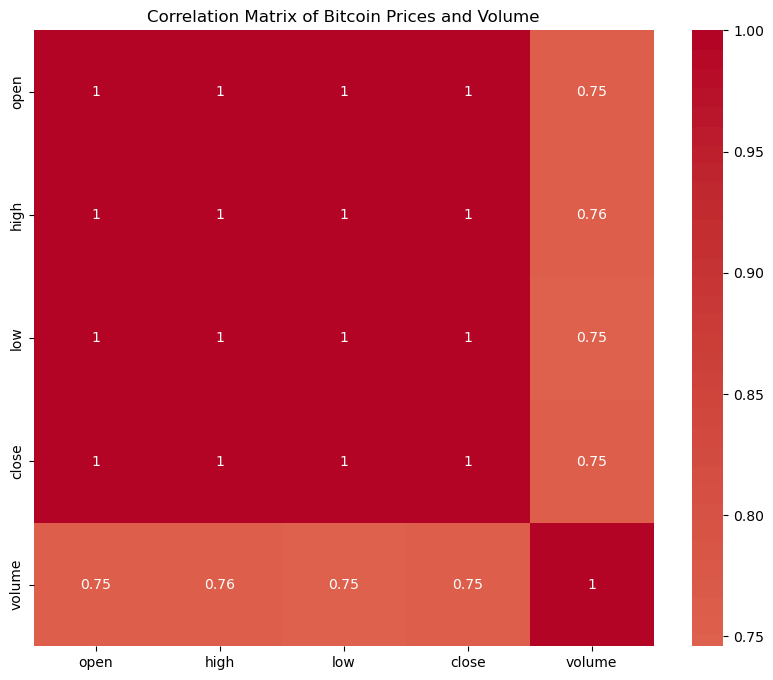

In [13]:
# 3.3 Correlation Analysis
plt.figure(figsize=(10, 8))
corr = df[['open', 'high', 'low', 'close', 'volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Bitcoin Prices and Volume')
plt.show()


correlation matrix 

The image displays a correlation matrix titled "Correlation Matrix of Bitcoin Prices and Volume."

The matrix shows the correlation coefficients between the following variables: "open," "high," "low," "close," and "volume."
The correlation coefficients are represented using a color scale, ranging from a darker red (close to 1) to a lighter shade (likely around 0.75, based on the color bar).
The numerical value of the correlation coefficient is also displayed within each cell of the matrix.
Analysis:

Here's a detailed breakdown of the key observations and insights:

Strong Positive Correlation Among Price Variables:

The correlation coefficients between "open," "high," "low," and "close" are all 1. This indicates a perfect positive linear relationship between these price variables.
This is expected, as these prices are inherently related within a single trading day. If the opening price is high, the high, low, and closing prices are also very likely to be high. They essentially move in lockstep.
Moderate Positive Correlation Between Price and Volume:

The correlation coefficients between "volume" and each of the price variables ("open," "high," "low," "close") are all approximately 0.75 or 0.76.
This indicates a moderate to strong positive linear relationship between trading volume and Bitcoin prices.
This suggests that as trading volume increases, the opening, high, low, and closing prices of Bitcoin tend to increase as well, and vice-versa.
Perfect Autocorrelation of Volume:

The correlation coefficient of "volume" with itself is 1. This is a given, as any variable is perfectly correlated with itself.
Color Scale Interpretation:

The color scheme reinforces the numerical values. The deep red color represents the perfect correlations (1), and the slightly lighter red shades represent the strong positive correlations (around 0.75).
Implications and Insights:

Redundancy in Price Variables: The perfect correlation among open, high, low, and close prices suggests that for some modeling purposes, using all four might be redundant. You could potentially use just one (e.g., "close") to represent the price level.
Volume as a Predictor?: The moderate positive correlation between volume and price suggests that volume could be a useful predictor of price movements. However, it's important to remember that correlation doesn't imply causation.
Market Dynamics: The correlation analysis provides insights into market dynamics. Higher trading volume often accompanies price increases, which can be driven by increased investor interest, speculation, or market activity.
Linear Relationship: The correlation coefficients measure the linear relationship between variables. There might be non-linear relationships that this analysis doesn't capture.


In [14]:
# 4. Feature Engineering
# 4.1 Lagged Features
df['open_lag1'] = df['open'].shift(1)
df['close_lag1'] = df['close'].shift(1)
df['volume_lag1'] = df['volume'].shift(1)

# 4.2 Rolling Statistics
window_size = 10  # You can adjust this window size
df[f'open_rolling_mean_{window_size}'] = df['open'].rolling(window=window_size).mean()
df[f'close_rolling_mean_{window_size}'] = df['close'].rolling(window=window_size).mean()
df[f'volume_rolling_mean_{window_size}'] = df['volume'].rolling(window=window_size).mean()

# 4.3 Volatility
df['price_range'] = df['high'] - df['low']
df['daily_return'] = df['close'].pct_change()

# 4.4 Date-Related Features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday  # 0: Monday, 6: Sunday

# 4.5 Rate of Change
df['open_pct_change'] = df['open'].pct_change()
df['close_pct_change'] = df['close'].pct_change()
df['volume_pct_change'] = df['volume'].pct_change()

# Remove rows with NaN values created by feature engineering
df.dropna(inplace=True)

# Display the first few rows with new features
print("Data with engineered features:")
print(df.head())

# Display the columns and their data types
print("\nData information:")
print(df.info())


Data with engineered features:
         date        open        high         low       close      volume  \
9  2014-09-26  411.428986  414.937988  400.009003  404.424988  21460800.0   
10 2014-09-27  403.556000  406.622986  397.372009  399.519989  15029300.0   
11 2014-09-28  399.471008  401.016998  374.332001  377.181000  23613300.0   
12 2014-09-29  376.928009  385.210999  372.239990  375.467010  32497700.0   
13 2014-09-30  376.088013  390.976990  373.442993  386.944000  34707300.0   

     open_lag1  close_lag1  volume_lag1  open_rolling_mean_10  ...  \
9   423.156006  411.574005   26814400.0            422.111301  ...   
10  411.428986  404.424988   21460800.0            415.880499  ...   
11  403.556000  399.519989   15029300.0            410.141601  ...   
12  399.471008  377.181000   23613300.0            405.424103  ...   
13  376.928009  375.467010   32497700.0            403.565604  ...   

    volume_rolling_mean_10  price_range  daily_return  year  month  day  \
9         

Advanced Exploratory Data Analysis (EDA)

Decompose Time Series

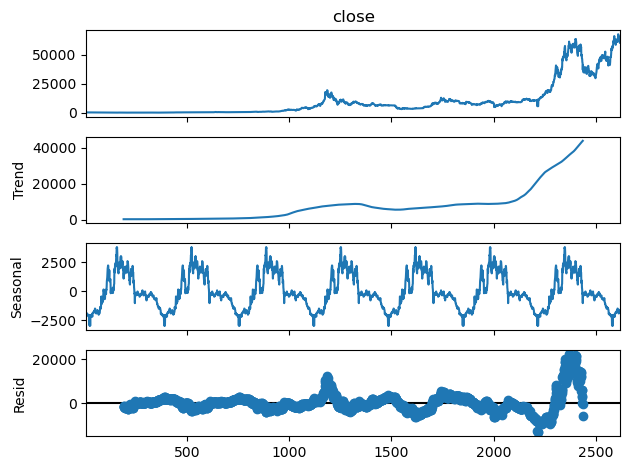

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose closing price
result = seasonal_decompose(df['close'], model='additive', period=365)  # Annual seasonality
result.plot()
plt.show()

"close" price time series

The image displays a decomposition of the "close" price time series using a technique called "seasonal decomposition of time series by moving averages" (or a similar decomposition method). It consists of four subplots:

Top Plot: "close" - This is the original time series of the closing price. It shows the price of the asset over time.
Second Plot: "Trend" - This plot shows the long-term trend component of the time series. It represents the general direction in which the price is moving, smoothing out short-term fluctuations.
Third Plot: "Seasonal" - This plot shows the seasonal component of the time series. It represents recurring patterns that occur at regular intervals (e.g., daily, weekly, yearly).
Bottom Plot: "Resid" (Residual) - This plot shows the residual or error component of the time series. It represents the variations in the price that are not explained by the trend or seasonality.
Analysis:

Here's a detailed analysis of each component and the overall decomposition:

Original Time Series ("close"):

The top plot shows the overall price movement. We can observe:
A general upward trend over the period.
Periods of relatively flat movement or consolidation.
Sharp increases (bullish periods) and sharp declines (bearish periods), indicating volatility.
A particularly dramatic surge towards the end of the time period.
Trend Component:

The trend plot reveals the long-term direction of the price.
It shows a gradual upward trend in the early part of the time period.
The trend becomes more pronounced and steep in the later part, indicating accelerated price growth.
The trend line smooths out the short-term fluctuations, highlighting the underlying direction.
Seasonal Component:

The seasonal plot shows recurring patterns that oscillate around zero.
We can observe relatively consistent cycles with peaks and troughs.
The cycles suggest some form of regular fluctuation in the price, which could be related to trading activity patterns, market sentiment, or other periodic influences.
It's important to note that "seasonal" in this context might not strictly refer to calendar seasons (like spring, summer, etc.) but rather to any recurring pattern within the data.
Residual Component:

The residual plot shows the noise or unexplained variation in the price after removing the trend and seasonality.
For a significant portion of the time period, the residuals are relatively small and fluctuate around zero, suggesting that the trend and seasonality explain much of the price variation.
However, towards the end of the time period, we see a large spike in the residuals, indicating that the model (decomposition) fails to fully capture the dramatic price surge observed in the original time series. This suggests that some other factor not accounted for by trend and seasonality significantly influenced the price.
Overall Interpretation and Insights:

Dominant Trend: The analysis indicates that the long-term upward trend is the dominant factor influencing the price movement.
Recurring Patterns: There are regular recurring patterns (seasonality), though their cause isn't specified in the image. These patterns contribute to short-term price fluctuations.
Limited Explanatory Power: While trend and seasonality explain a significant portion of the price variation, the large residuals at the end indicate that other factors (e.g., external events, market sentiment shifts, etc.) played a crucial role, especially during the rapid price increase.
Modeling Implications:
For long-term forecasting, focusing on the trend component is crucial.
For short-term forecasting, considering the seasonal component might improve accuracy.
The large residuals suggest that models need to incorporate other variables or factors to capture the full dynamics of price movements.


Volatility Analysis

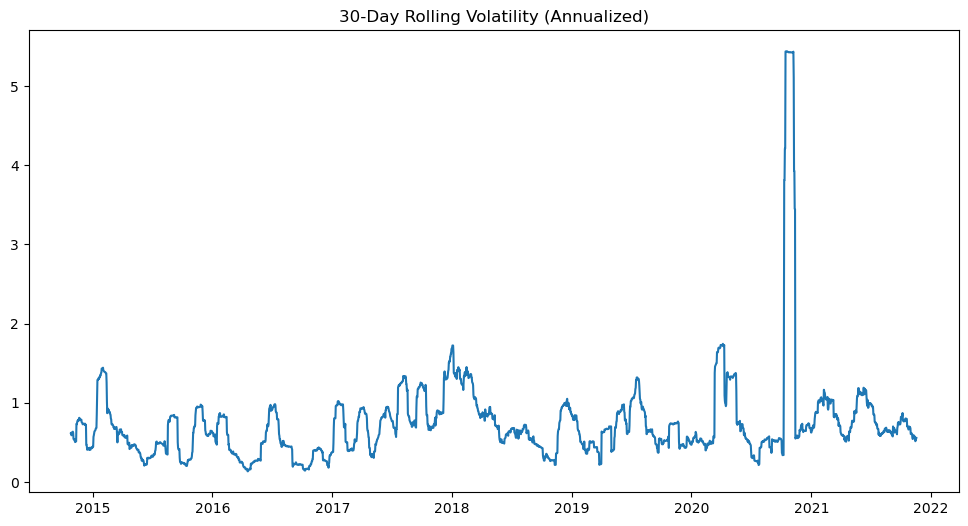

In [16]:
# Calculate daily returns and rolling volatility
df['daily_return'] = df['close'].pct_change()
df['rolling_volatility'] = df['daily_return'].rolling(window=30).std() * np.sqrt(365)  # Annualized

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['rolling_volatility'])
plt.title('30-Day Rolling Volatility (Annualized)')
plt.show()

30-Day Rolling Volatility

The image displays a line plot titled "30-Day Rolling Volatility (Annualized)."

The x-axis represents time, spanning from approximately 2015 to 2022.
The y-axis represents the annualized volatility, with values ranging from 0 to over 5.
The plot shows how the annualized volatility of the asset changes over time, calculated using a 30-day rolling window.
Analysis:

Here's a detailed breakdown of the key observations and insights:

General Volatility Pattern:

The plot shows that the volatility is not constant over time. It exhibits periods of both high and low volatility.
For most of the period, the volatility remains below 2, indicating relatively moderate price fluctuations.
Early Years (2015-2017):

The volatility in the early years (2015-2017) shows fluctuations but generally stays at a lower level, mostly below 1.5. This suggests that the asset's price movements were less dramatic during this period compared to later years.
Increased Volatility (2017-2020):

From around 2017 onwards, we observe a general increase in the volatility, with more frequent and larger spikes. This indicates that the asset's price started experiencing more significant swings.
There are periods where the volatility rises above 1.5 and even approaches 2, suggesting higher risk and more unpredictable price changes.
Significant Volatility Spike (Around 2021):

The most striking feature is the massive, isolated spike in volatility around 2021. This spike is significantly higher than any other point in the plot, reaching above 5.
This indicates an extremely volatile event or period, where the asset's price experienced an abrupt and substantial change. It's crucial to identify the cause of this spike to understand its impact on the market.
Volatility Decline (Post-Spike):

After the large spike, the volatility appears to return to lower levels, although it still shows some fluctuations. This suggests that the extreme volatility was a temporary phenomenon.
Implications and Insights:

Risk Assessment: The volatility plot provides essential information for risk assessment. Higher volatility implies higher risk, as price movements are more unpredictable.
Trading Strategies: Traders can use volatility information to adjust their trading strategies. Higher volatility might present opportunities for profit but also increases the risk of losses.
Market Dynamics: Changes in volatility can reflect changes in market sentiment, investor behavior, and external events.
Modeling: Volatility is a crucial input for many financial models, including those used for pricing options and managing portfolios.


Candlestick Chart

In [19]:
!pip install mplfinance

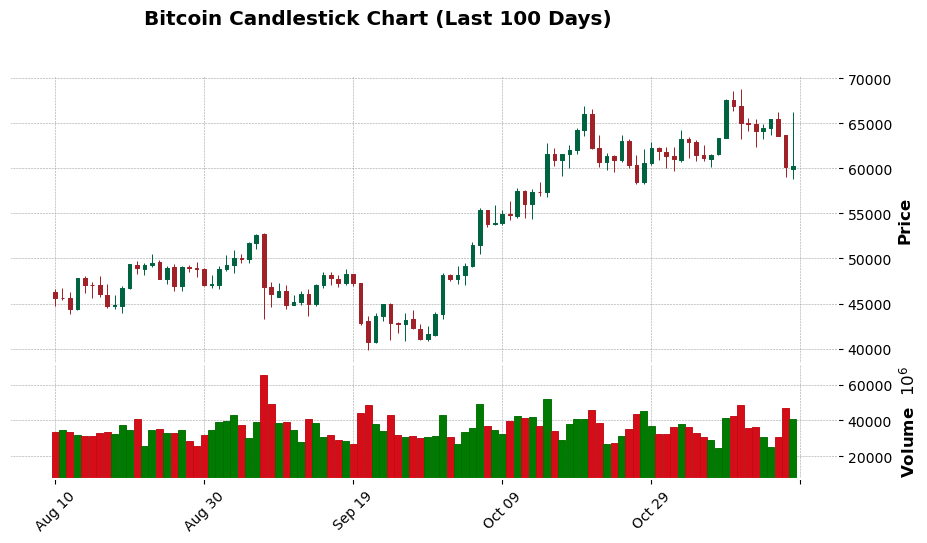

In [20]:
import mplfinance as mpf

# Prepare the dataframe for mplfinance
df_candlestick = df.set_index('date')
df_candlestick = df_candlestick.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
})

# Plot last 100 days
mpf.plot(df_candlestick[-100:], 
         type='candle', 
         style='charles', 
         title='Bitcoin Candlestick Chart (Last 100 Days)',
         volume=True,  # Show volume bars
         figratio=(12, 6))

The image displays a candlestick chart with volume bars.

Top Section (Candlestick Chart):
The x-axis represents time, spanning approximately from August 10 to November (likely a bit beyond October 29).
The y-axis on the right represents the price of Bitcoin, ranging from around 40,000 to 70,000.
Candlesticks represent the price movement for each trading period (likely daily).
Green candlesticks indicate that the closing price was higher than the opening price.
Red candlesticks indicate that the closing price was lower than the opening price.
The "body" of the candlestick represents the range between the open and close prices.   
The "wicks" or "shadows" extending above and below the body represent the highest and lowest prices reached during that period.
Bottom Section (Volume Bars):
The x-axis aligns with the candlestick chart's x-axis, representing the same time period.
The y-axis on the right represents the volume of Bitcoin traded, scaled in millions (x 10^6).
Green volume bars correspond to the green candlesticks (price increase).
Red volume bars correspond to the red candlesticks (price decrease).
The height of the bars represents the trading volume for that period.
Analysis:

Here's a detailed breakdown of the key observations and insights:

Overall Price Trend:

The chart shows a general upward trend in Bitcoin's price over the 100-day period.
The price starts around 45,000 and rises to around 70,000, indicating a significant bullish (rising) market.
Specific Price Movements:

Early Fluctuations (August): The chart begins with a period of price fluctuations, with both green and red candlesticks of varying sizes, suggesting some volatility but without a clear dominant trend.
Mid-Period Consolidation (Late August - Early September): There's a period of consolidation where the price moves sideways within a range, with smaller candlesticks.
Strong Uptrend (September - October): A strong and consistent uptrend begins in September, characterized by mostly green candlesticks and increasingly larger price increases. This suggests strong buying pressure.
Peak and Potential Reversal (Late October - Early November): The price reaches its peak in late October/early November, and there are signs of potential reversal or consolidation with some red candlesticks appearing.
Volume Analysis:

Relatively Consistent Volume: The volume bars show relatively consistent trading volume throughout the period, with some fluctuations.
Volume and Trend Confirmation: Generally, the volume bars seem to support the price trend. The stronger uptrend in September-October is accompanied by moderate to high volume. This confirms the strength of the trend (rising prices with rising or sustained volume).
Volume Spikes: There are some noticeable volume spikes, both green and red, indicating periods of increased trading activity. It's important to analyze these spikes in conjunction with the price action.
Candlestick Patterns:

Analyzing individual candlestick patterns can provide more granular insights. For example, large green candlesticks indicate strong buying pressure, while large red candlesticks indicate strong selling pressure.
The presence of specific candlestick patterns (e.g., engulfing patterns, doji patterns) can signal potential reversals or continuations of trends.
Implications and Insights:

Bullish Market: The overall chart indicates a strong bullish trend in Bitcoin's price over the last 100 days.
Volume Confirmation: The volume data generally supports the price trend, suggesting that the price increase is backed by trading activity.
Potential Reversal: The recent price action near the peak warrants close attention. Traders and analysts may look for confirmation of a reversal (e.g., a series of red candlesticks with increasing volume) or a continuation of the uptrend.
Trading Opportunities: The chart provides valuable information for traders to identify potential entry and exit points based on price trends, candlestick patterns, and volume signals.

candlestick chart of Bitcoin prices over the last 100 days

Feature Engineering

Technical Indicators

In [22]:
# Moving Averages
df['MA_20'] = df['close'].rolling(window=20).mean()  # Added this missing line
df['MA_50'] = df['close'].rolling(window=50).mean()
df['MA_200'] = df['close'].rolling(window=200).mean()

# Relative Strength Index (RSI)
delta = df['close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
df['Upper_Band'] = df['MA_20'] + (2 * df['close'].rolling(window=20).std())
df['Lower_Band'] = df['MA_20'] - (2 * df['close'].rolling(window=20).std())

# Drop rows with NaN values (created by rolling calculations)
df.dropna(inplace=True)

# Show the last few rows with the new indicators
print(df[['date', 'close', 'MA_20', 'MA_50', 'MA_200', 'RSI', 'Upper_Band', 'Lower_Band']].tail())

           date         close         MA_20         MA_50        MA_200  \
2614 2021-11-13  64469.527344  62784.322070  57551.285938  45836.035918   
2615 2021-11-14  65466.839844  62905.672852  58006.290859  45889.246602   
2616 2021-11-15  63557.871094  63065.376758  58413.277500  45939.260410   
2617 2021-11-16  60161.246094  63149.319727  58771.787813  45951.315762   
2618 2021-11-17  60276.031250  63132.014453  59156.617578  45963.555664   

            RSI    Upper_Band    Lower_Band  
2614  58.393721  67300.243457  58268.400683  
2615  63.126036  67578.223004  58233.122700  
2616  57.339808  67588.057515  58542.696001  
2617  41.746692  67365.798543  58932.840911  
2618  42.690305  67394.752340  58869.276566  


b. Lag Features

In [23]:
for lag in [1, 7, 30]:  # 1-day, 1-week, 1-month lags
    df[f'close_lag_{lag}'] = df['close'].shift(lag)

Time Series Forecasting

 ARIMA

In [24]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['close'], order=(5,1,0))  # Example: ARIMA(5,1,0)
results = model.fit()
forecast = results.get_forecast(steps=30)  # 30-day forecast
print(forecast.predicted_mean)

C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2411    60375.069109
2412    60160.453975
2413    59905.856872
2414    59862.395071
2415    59874.228042
2416    59855.029115
2417    59832.902174
2418    59826.565250
2419    59826.772054
2420    59825.250647
2421    59823.252979
2422    59822.507961
2423    59822.432792
2424    59822.300575
2425    59822.121875
2426    59822.040101
2427    59822.024233
2428    59822.011535
2429    59821.995473
2430    59821.986908
2431    59821.984597
2432    59821.983285
2433    59821.981820
2434    59821.980949
2435    59821.980657
2436    59821.980515
2437    59821.980379
2438    59821.980292
2439    59821.980258
2440    59821.980242
Name: predicted_mean, dtype: float64


C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


. Prophet (Facebook)

In [26]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -----------------

00:59:00 - cmdstanpy - INFO - Chain [1] start processing
00:59:05 - cmdstanpy - INFO - Chain [1] done processing


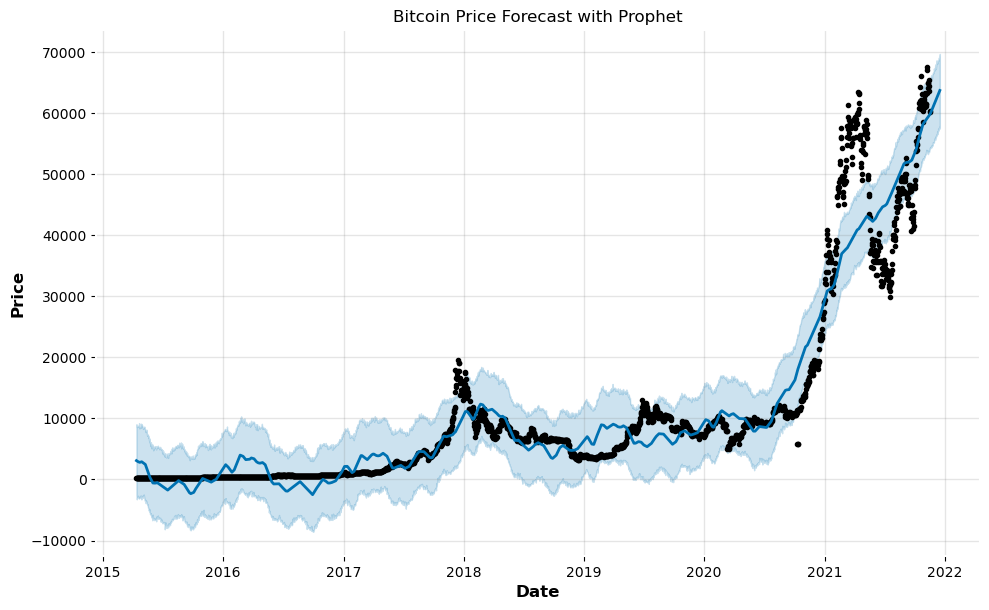

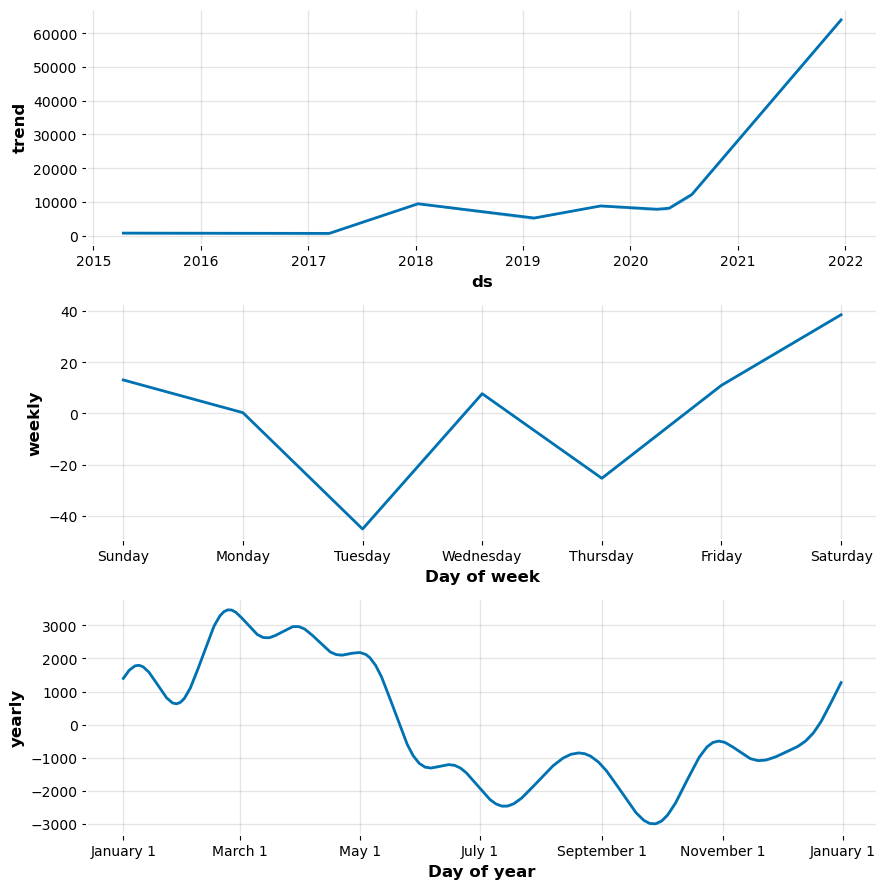

In [27]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare the dataframe
prophet_df = df[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# Initialize and fit the model
model = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.05
)
model.fit(prophet_df)

# Create future dataframe (30 days into the future)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Bitcoin Price Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot components
fig2 = model.plot_components(forecast)
plt.show()

LSTM (Deep Learning)

Bitcoin price forecast using the Prophet model.]

Image Description:

The image displays a time series plot showing the historical and forecasted prices of Bitcoin, generated by the Prophet forecasting model.

X-axis: Represents time, spanning from approximately 2015 to 2022.
Y-axis: Represents the price of Bitcoin.
Black Dots: Represent the actual historical Bitcoin prices.
Blue Line: Represents the Prophet model's forecasted price trend.
Light Blue Shaded Area: Represents the uncertainty interval or confidence interval of the forecast. It indicates the range within which the model predicts the future price is likely to fall.
Analysis:

Here's a detailed breakdown of the key observations and insights:

Overall Trend Capture:

The Prophet model captures the general upward trend of Bitcoin's price over the historical period. The blue line follows the overall direction of the black dots.
Early Years (2015-2017):

In the early years, the model's forecast (blue line) stays relatively close to the actual prices (black dots), indicating a reasonable fit.
The confidence interval (light blue area) is wider in this period, reflecting greater uncertainty in the forecast due to lower price levels and potentially less predictable price movements.
2017-2018 Bull Run and Correction:

The model captures the significant price increase in 2017-2018 (the bull run). However, the forecast line smooths out the sharp peak and the subsequent correction.
The confidence interval widens during this volatile period, indicating increased uncertainty.
2019-2020 Gradual Increase:

The model generally follows the gradual price increase observed in 2019-2020.
The confidence interval narrows somewhat compared to the 2017-2018 period, suggesting improved forecast accuracy.
2020-2021 Major Bull Run:

The model successfully captures the significant price surge in 2020-2021. The blue line and the black dots show a strong upward movement.
However, the model again tends to smooth out the sharpest peaks and troughs, suggesting a limitation in capturing very rapid price changes.
The confidence interval widens again during this highly volatile period, reflecting the difficulty in predicting such rapid price increases.
Forecast Beyond 2021:

The model continues to forecast an upward trend beyond 2021, although the rate of increase appears to be moderating.
The confidence interval remains relatively wide, indicating ongoing uncertainty in the future price predictions.
Implications and Insights:

Trend Identification: The Prophet model is effective at identifying the overall trend in Bitcoin's price.
Smoothing Effect: The model tends to smooth out sharp price fluctuations, which is a common characteristic of many time series forecasting models. This can limit its accuracy in predicting short-term volatility.
Uncertainty Quantification: The confidence intervals provide valuable information about the uncertainty associated with the forecast. Wider intervals indicate higher uncertainty.
Long-Term vs. Short-Term Forecasting: The model might be more suitable for long-term trend forecasting than for precise short-term price prediction, especially during periods of high volatility.
Model Limitations: The model's performance can be affected by factors not explicitly included, such as external events, market sentiment, and regulatory changes.


"trend" component extracted from a time series decomposition

Image Description:

The image displays a line plot showing the trend component of a time series.

X-axis: Represented as "ds," which likely stands for "date" or a similar time variable. It spans from approximately 2015 to 2022.
Y-axis: Labeled "trend," representing the long-term underlying direction of the time series, extracted by a decomposition method. The trend values range from 0 to over 60,000.
Analysis:

Here's a breakdown of the key observations and insights:

Early Flat Trend (2015-2017):

The trend component is relatively flat and close to 0 for the period between 2015 and 2017. This indicates that, according to the decomposition, there was little to no significant long-term upward or downward movement in the underlying time series during these years.
Gradual Increase (2017-2020):

Starting around 2017, the trend begins to show a gradual increase. This suggests that the underlying time series started to exhibit a slow, long-term upward movement.
The increase is not linear but rather shows some curvature, indicating that the rate of increase was not constant.
Sharp Acceleration (2020-2022):

The most prominent feature is the sharp and rapid acceleration of the trend beginning around 2020. The trend line becomes almost vertical, indicating a very steep and significant long-term upward movement.
This suggests that the underlying time series experienced a period of explosive growth during this time, with the long-term direction pointing strongly upwards.
Overall Upward Trend:

Despite the early flat period, the overall picture is one of an upward trend, especially pronounced in the later years. This implies that the underlying time series (likely Bitcoin price, based on previous context) has exhibited a general tendency to increase over the long term.
Implications and Insights:

Long-Term Growth: The trend component highlights the long-term growth pattern of the time series, filtering out short-term fluctuations and noise.
Phases of Growth: The plot clearly shows different phases of growth:
A period of stagnation or minimal growth.
A period of gradual growth.
A period of rapid growth.
Forecasting: The trend component is crucial for long-term forecasting. Models that capture this trend are likely to be more accurate in predicting the overall direction of the time series.
Underlying Factors: The sharp acceleration in the trend suggests that some fundamental shift occurred around 2020, significantly impacting the underlying time series. Identifying the factors that caused this shift (e.g., increased institutional adoption, macroeconomic conditions, etc.) is important.

weekly and yearly seasonality components 

The image consists of two subplots:

Top Subplot: "weekly" - This plot shows the weekly seasonality component.
The x-axis represents the "Day of week," ranging from Sunday to Saturday.
The y-axis represents the "weekly" seasonality effect, ranging from approximately -40 to 40.
Bottom Subplot: "yearly" - This plot shows the yearly seasonality component.
The x-axis represents the "Day of year," marked with dates like January 1, March 1, May 1, etc.
The y-axis represents the "yearly" seasonality effect, ranging from approximately -3000 to 3000.
Analysis:

Here's a detailed breakdown of each component and the overall interpretation:

1. Weekly Seasonality:

Pattern: The weekly seasonality plot reveals a distinct pattern of fluctuations within a week.
Tuesday Dip: There's a noticeable dip in the weekly effect around Tuesday. This suggests that, on average, the time series (likely Bitcoin price) tends to be lower or experience a downward pressure on Tuesdays.
Weekend Rise: There's a general rise in the weekly effect towards the weekend, particularly on Saturday. This indicates that the time series tends to be higher or experience upward pressure towards the end of the week.
Magnitude: The magnitude of the weekly effect is relatively small, with fluctuations ranging from -40 to 40. This implies that the weekly patterns contribute a moderate amount to the overall time series variation compared to the trend or yearly seasonality.
2. Yearly Seasonality:

Pattern: The yearly seasonality plot shows a more complex pattern of fluctuations throughout the year.
Early Year Rise: There's a general rise in the yearly effect from January 1 to around March 1. This suggests a tendency for the time series to increase or experience upward pressure during the early part of the year.
Mid-Year Decline: A significant decline is observed from around March 1 to around July 1. This indicates a tendency for the time series to decrease or experience downward pressure during the mid-year period.
Late Summer/Early Fall Low: The yearly effect reaches its lowest point around September 1, suggesting a period of potential weakness or downward pressure.
Late Year Recovery: There's a recovery and rise in the yearly effect towards the end of the year, particularly from November 1 to January 1. This hints at a tendency for the time series to increase or experience upward pressure in the late months.
Magnitude: The magnitude of the yearly effect is considerably larger than the weekly effect, with fluctuations ranging from -3000 to 3000. This implies that the yearly patterns contribute more significantly to the overall time series variation.
Overall Interpretation and Insights:

Recurring Patterns: Both plots clearly demonstrate the presence of recurring patterns in the time series, suggesting that it's influenced by periodic factors.
Potential Drivers: While the plots identify the patterns, they don't explain the underlying causes. Potential drivers for weekly patterns could include trading activity variations, while yearly patterns might be linked to market cycles, seasonal demand, or regulatory changes.
Modeling Importance: Incorporating these seasonality components into forecasting models can improve their accuracy by capturing the predictable periodic fluctuations in the time series.
Contextual Relevance: The specific interpretation of these patterns depends heavily on the context of the time series (e.g., Bitcoin price, stock prices, sales data).


In [31]:
!pip install tensorflow scikit-learn

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optree-0.15

ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



   ------------------------------------- -- 353.4/376.0 MB 1.2 MB/s eta 0:00:20
   ------------------------------------- -- 353.9/376.0 MB 1.2 MB/s eta 0:00:19
   ------------------------------------- -- 354.2/376.0 MB 1.2 MB/s eta 0:00:19
   ------------------------------------- -- 354.4/376.0 MB 1.2 MB/s eta 0:00:19
   ------------------------------------- -- 354.7/376.0 MB 1.2 MB/s eta 0:00:19
   ------------------------------------- -- 355.2/376.0 MB 1.2 MB/s eta 0:00:18
   ------------------------------------- -- 355.7/376.0 MB 1.2 MB/s eta 0:00:18
   ------------------------------------- -- 356.0/376.0 MB 1.2 MB/s eta 0:00:17
   ------------------------------------- -- 356.3/376.0 MB 1.2 MB/s eta 0:00:17
   ------------------------------------- -- 356.8/376.0 MB 1.2 MB/s eta 0:00:16
   ------------------------------------- -- 357.0/376.0 MB 1.2 MB/s eta 0:00:16
   -------------------------------------- - 357.3/376.0 MB 1.2 MB/s eta 0:00:16
   -------------------------------------

In [41]:
!pip install torch

In [44]:
# First uninstall existing PyTorch
!pip uninstall torch torchvision torchaudio -y



Found existing installation: torch 2.6.0


Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0


In [50]:
# Then install fresh PyTorch with CPU-only version (smaller)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.6.0%2Bcpu-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.21.0%2Bcpu-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.6.0%2Bcpu-cp312-cp312-win_amd64.whl.metadata (6.7 kB)
Using cached https://download.pytorch.org/whl/cpu/torch-2.6.0%2Bcpu-cp312-cp312-win_amd64.whl (206.5 MB)
Using cached https://download.pytorch.org/whl/cpu/torchvision-0.21.0%2Bcpu-cp312-cp312-win_amd64.whl (1.6 MB)
Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.6.0%2Bcpu-cp312-cp312-win_amd64.whl (2.4 MB)


In [53]:
# First, clean existing installation
!pip uninstall torch torchvision torchaudio -y

# Then install latest stable CPU version
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.6.0%2Bcpu-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.21.0%2Bcpu-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.6.0%2Bcpu-cp312-cp312-win_amd64.whl.metadata (6.7 kB)
Using cached https://download.pytorch.org/whl/cpu/torch-2.6.0%2Bcpu-cp312-cp312-win_amd64.whl (206.5 MB)
Using cached https://download.pytorch.org/whl/cpu/torchvision-0.21.0%2Bcpu-cp312-cp312-win_amd64.whl (1.6 MB)
Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.6.0%2Bcpu-cp312-cp312-win_amd64.whl (2.4 MB)


In [1]:
import torch
print(f"PyTorch version: {torch.__version__}")
print("CUDA available:", torch.cuda.is_available())  # Should be False since we installed CPU version
print("Test tensor:", torch.rand(5))

PyTorch version: 2.6.0+cpu
CUDA available: False
Test tensor: tensor([0.0474, 0.6937, 0.3907, 0.1391, 0.3452])


Epoch 1/20: Train Loss: nan, Val Loss: nan
Epoch 2/20: Train Loss: nan, Val Loss: nan
Epoch 3/20: Train Loss: nan, Val Loss: nan
Epoch 4/20: Train Loss: nan, Val Loss: nan
Epoch 5/20: Train Loss: nan, Val Loss: nan
Epoch 6/20: Train Loss: nan, Val Loss: nan
Epoch 7/20: Train Loss: nan, Val Loss: nan
Epoch 8/20: Train Loss: nan, Val Loss: nan
Epoch 9/20: Train Loss: nan, Val Loss: nan
Epoch 10/20: Train Loss: nan, Val Loss: nan
Epoch 11/20: Train Loss: nan, Val Loss: nan
Epoch 12/20: Train Loss: nan, Val Loss: nan
Epoch 13/20: Train Loss: nan, Val Loss: nan
Epoch 14/20: Train Loss: nan, Val Loss: nan
Epoch 15/20: Train Loss: nan, Val Loss: nan
Epoch 16/20: Train Loss: nan, Val Loss: nan
Epoch 17/20: Train Loss: nan, Val Loss: nan
Epoch 18/20: Train Loss: nan, Val Loss: nan
Epoch 19/20: Train Loss: nan, Val Loss: nan
Epoch 20/20: Train Loss: nan, Val Loss: nan


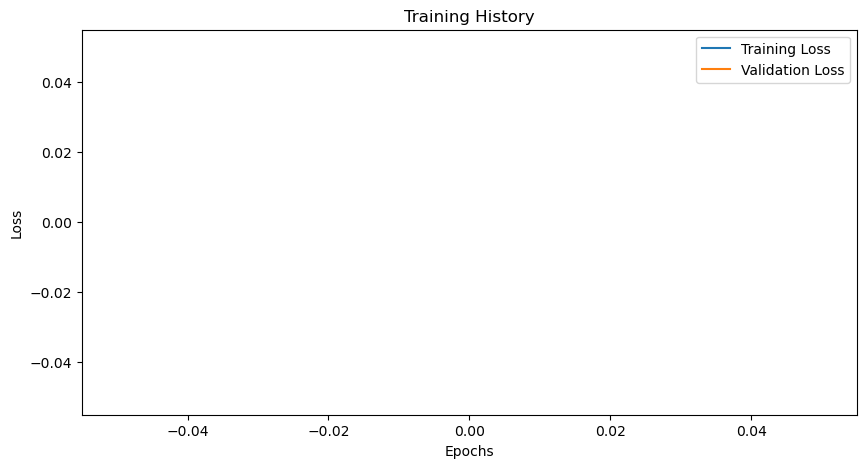

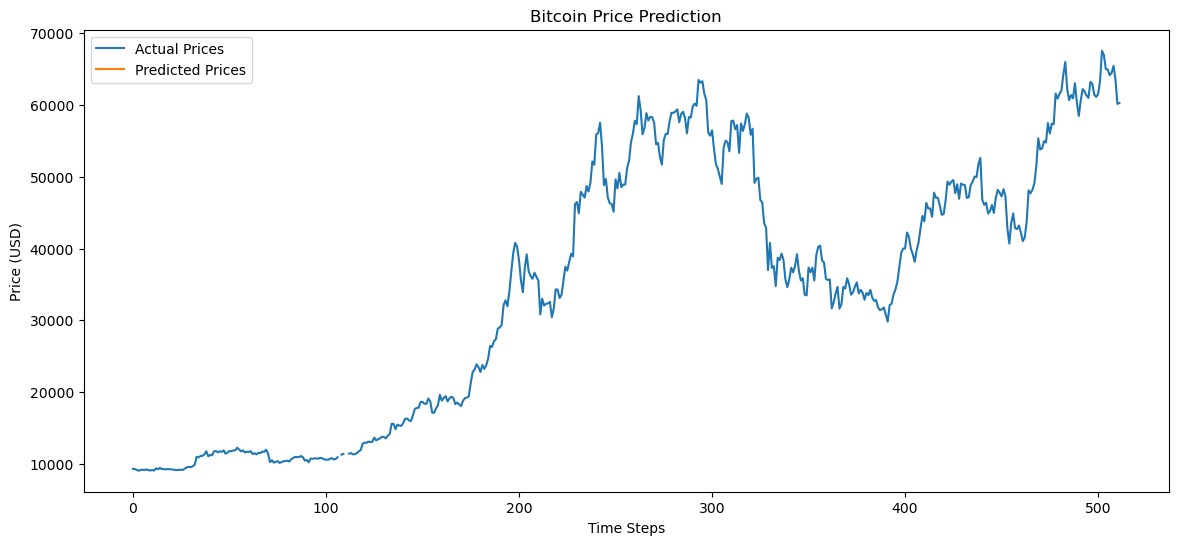

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from pathlib import Path

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# 1. Data Preparation ------------------------------------------------
def load_and_preprocess_data(filepath=r'C:\Users\HP 03306897941\Desktop\Junaid\Data Science\Data Science Projects\Bitcoin Project\bitcoin-usd.csv'):
    """Load and preprocess the Bitcoin price data"""
    df = pd.read_csv(filepath)
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    
    # Normalize the closing prices
    scaler = MinMaxScaler()
    df['scaled_close'] = scaler.fit_transform(df[['close']])
    
    return df, scaler

# 2. Sequence Creation -----------------------------------------------
def create_sequences(data, seq_length=60):
    """Create input sequences and target values for LSTM"""
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# 3. PyTorch Dataset ------------------------------------------------
class BitcoinDataset(Dataset):
    def __init__(self, sequences, targets):
        self.X = torch.FloatTensor(sequences).unsqueeze(-1)  # Add feature dimension
        self.y = torch.FloatTensor(targets)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# 4. LSTM Model -----------------------------------------------------
class BitcoinLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.2
        )
        self.linear = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        # LSTM layer
        lstm_out, _ = self.lstm(x)
        
        # Only take the output from the final timestep
        last_time_step = lstm_out[:, -1, :]
        
        # Fully connected layer
        return self.linear(last_time_step)

# 5. Training Function ----------------------------------------------
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    train_losses, val_losses = [], []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        batch_losses = []
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            batch_losses.append(loss.item())
        train_loss = np.mean(batch_losses)
        train_losses.append(train_loss)
        
        # Validation phase
        model.eval()
        with torch.no_grad():
            val_loss = 0
            for X_val, y_val in val_loader:
                outputs = model(X_val)
                val_loss += criterion(outputs.squeeze(), y_val).item()
            val_loss /= len(val_loader)
            val_losses.append(val_loss)
        
        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.5f}, Val Loss: {val_loss:.5f}')
    
    return train_losses, val_losses

# Main Execution ----------------------------------------------------
if __name__ == "__main__":
    # Load and prepare data
    df, scaler = load_and_preprocess_data()
    
    # Create sequences
    X, y = create_sequences(df['scaled_close'].values)
    
    # Split into train/validation
    split_idx = int(len(X) * 0.8)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]
    
    # Create datasets and loaders
    train_dataset = BitcoinDataset(X_train, y_train)
    val_dataset = BitcoinDataset(X_val, y_val)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    
    # Initialize model, loss, and optimizer
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = BitcoinLSTM().to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    # Train the model
    train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer)
    
    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Make predictions
    model.eval()
    with torch.no_grad():
        # Prepare validation data
        X_val_tensor = torch.FloatTensor(X_val).unsqueeze(-1).to(device)
        predictions = model(X_val_tensor).cpu().numpy()
        
        # Inverse transform to original scale
        predictions = scaler.inverse_transform(predictions)
        y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
        
        # Plot results
        plt.figure(figsize=(14, 6))
        plt.plot(y_val_actual, label='Actual Prices')
        plt.plot(predictions, label='Predicted Prices')
        plt.title('Bitcoin Price Prediction')
        plt.xlabel('Time Steps')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.show()

Bitcoin price prediction plot.

Image Description:

The image displays a time series plot comparing actual and predicted Bitcoin prices.

X-axis: Represents "Time Steps," indicating the progression of time (likely discrete time intervals).
Y-axis: Represents "Price (USD)," showing the price of Bitcoin in US dollars.
Blue Line: Represents the "Actual Prices" of Bitcoin.
Orange Line: Represents the "Predicted Prices" of Bitcoin.
Analysis:

Here's a detailed breakdown of the key observations and insights:

Overall Trend Following:

The predicted prices (orange line) generally follow the overall trend of the actual prices (blue line). This suggests that the model used for prediction is capable of capturing the general direction of price movement.
Early Period Accuracy:

In the early time steps (approximately 0 to 100), the predicted prices closely match the actual prices, indicating good accuracy during this period. The model seems to perform well when the price movement is relatively stable.
Lag or Smoothing Effect:

As the price starts to exhibit more significant fluctuations (around time step 100 onwards), the predicted prices appear to lag behind the actual prices or show a smoothing effect. The orange line doesn't capture the sharp peaks and troughs of the blue line as precisely.
This suggests that the model might be less effective at predicting short-term, high-frequency price volatility.
Underestimation of Peaks and Overestimation of Troughs:

The model tends to underestimate the peaks of the price surges and overestimate the troughs of the price drops. This indicates that the model might not fully capture the magnitude of extreme price movements.
Later Period Accuracy:

In the later time steps (around 400 onwards), the predicted prices again show a reasonable alignment with the overall trend of the actual prices, but the lag and smoothing effect are still present.
Implications and Insights:

Trend Prediction Capability: The model demonstrates a capability to predict the general upward and downward trends in Bitcoin prices.
Limitations in Volatility Capture: The model struggles to accurately predict short-term price volatility and extreme price fluctuations.
Potential for Trading Strategies: The model might be useful for identifying longer-term trends and potential entry/exit points, but it might not be reliable for high-frequency trading strategies that rely on capturing short-term price swings.
Model Refinement: The model could potentially be improved by incorporating factors that contribute to price volatility, such as trading volume, news sentiment, or technical indicators.


Machine Learning for Price Prediction

Train-Test Split (Time-Based)

In [5]:
split_date = '2023-01-01'
train = df[df['date'] < split_date]
test = df[df['date'] >= split_date]

Feature Selection & Model Training

In [7]:
# Calculate moving average
df['MA_50'] = df['close'].rolling(window=50).mean()

# Calculate RSI
delta = df['close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Create lagged price
df['close_lag_1'] = df['close'].shift(1)

# Drop rows with NaN values (created by rolling calculations)
df.dropna(inplace=True)

Mean Squared Error: 688213597.14
Mean Absolute Error: 20542.90

Feature Importances:
       Feature  Importance
2  close_lag_1    0.960157
0        MA_50    0.035423
1          RSI    0.003348
3       volume    0.001073


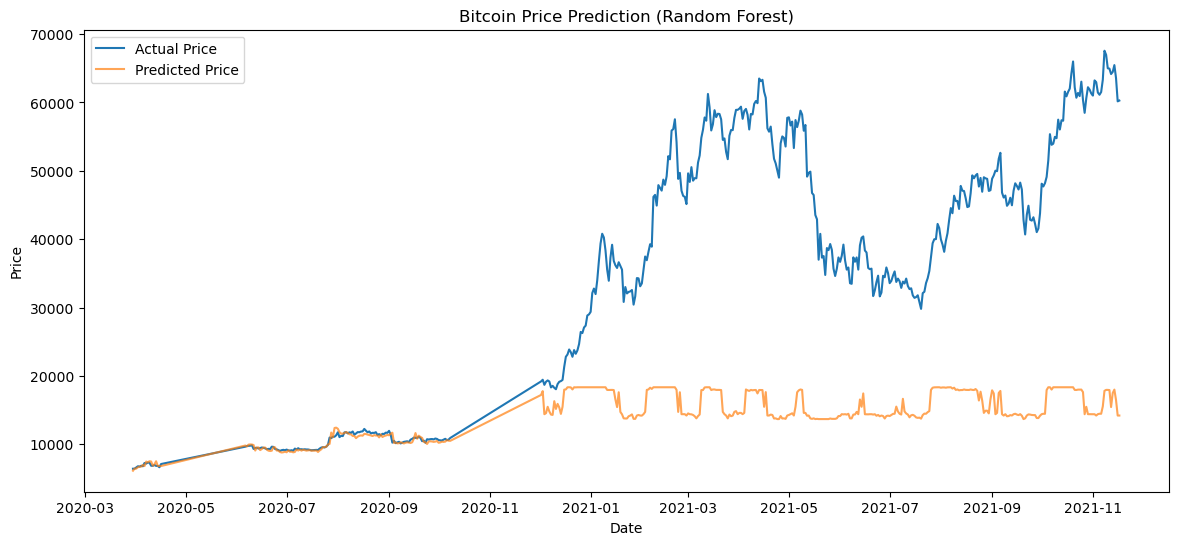

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define features and target
features = ['MA_50', 'RSI', 'close_lag_1', 'volume']
target = 'close'

# Split into train/test sets
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Initialize and train model
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # Use all available cores
)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance)

# Plot predictions vs actual
plt.figure(figsize=(14, 6))
plt.plot(test['date'], y_test, label='Actual Price')
plt.plot(test['date'], predictions, label='Predicted Price', alpha=0.7)
plt.title('Bitcoin Price Prediction (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Bitcoin price prediction plot using a Random Forest model

Image Description:

The image displays a time series plot comparing actual and predicted Bitcoin prices.

X-axis: Represents "Date," spanning from approximately March 2020 to November 2021.
Y-axis: Represents "Price," showing the price of Bitcoin.
Blue Line: Represents the "Actual Price" of Bitcoin.
Orange Line: Represents the "Predicted Price" of Bitcoin, generated by a Random Forest model.
Analysis:

Here's a detailed breakdown of the key observations and insights:

Early Period Accuracy (March 2020 - November 2020):

In the early part of the plot, the predicted prices (orange line) closely follow the actual prices (blue line). This suggests that the Random Forest model performs reasonably well in capturing the initial upward trend during this period.
Failure to Capture Volatility (Post-November 2020):

After approximately November 2020, the model's predictive performance deteriorates significantly. The predicted prices become relatively flat and fail to capture the substantial price fluctuations and the overall upward trend observed in the actual prices.
The orange line stays within a narrow range, while the blue line exhibits a dramatic increase and subsequent volatility.
Flat Predictions:

The predicted prices (orange line) essentially become a flat line for a large portion of the period after November 2020. This indicates that the Random Forest model is not effectively capturing the dynamic changes in Bitcoin's price.
Model Limitations:

The flat predictions suggest that the Random Forest model, in this implementation, lacks the ability to extrapolate or forecast the complex, non-linear patterns present in the Bitcoin price data.
Random Forests are generally good at interpolation (predicting within the range of training data) but may struggle with extrapolation (predicting beyond the range of training data), which is crucial for time series forecasting.
Implications and Insights:

Limited Forecasting Ability: The Random Forest model, as presented, has limited forecasting ability for Bitcoin prices, especially during periods of high volatility and significant trend changes.
Feature Engineering Importance: The model's poor performance might be attributed to the features used for training. If the features don't adequately capture the time dependencies and complex dynamics of the price series, the Random Forest model will struggle to make accurate predictions.
Model Suitability: Random Forests might not be the most suitable model for time series forecasting, especially for assets with high volatility and complex patterns like Bitcoin. Other models, such as LSTM (Long Short-Term Memory) networks or ARIMA (Autoregressive Integrated Moving Average) models, are often preferred for time series tasks.
Data Period Relevance: The model might be overfitting to the early period, or the features might be more relevant to that period, but losing their predictive power later.

Evaluation

In [9]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"R² Score: {r2_score(y_test, predictions)}")

MAE: 20542.896704329676
R² Score: -0.9564817778768289


 Anomaly Detection

 Isolation Forest

In [10]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.01)  # 1% anomalies
df['anomaly'] = clf.fit_predict(df[['close', 'volume']])
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1=anomaly

 Plot Anomalies

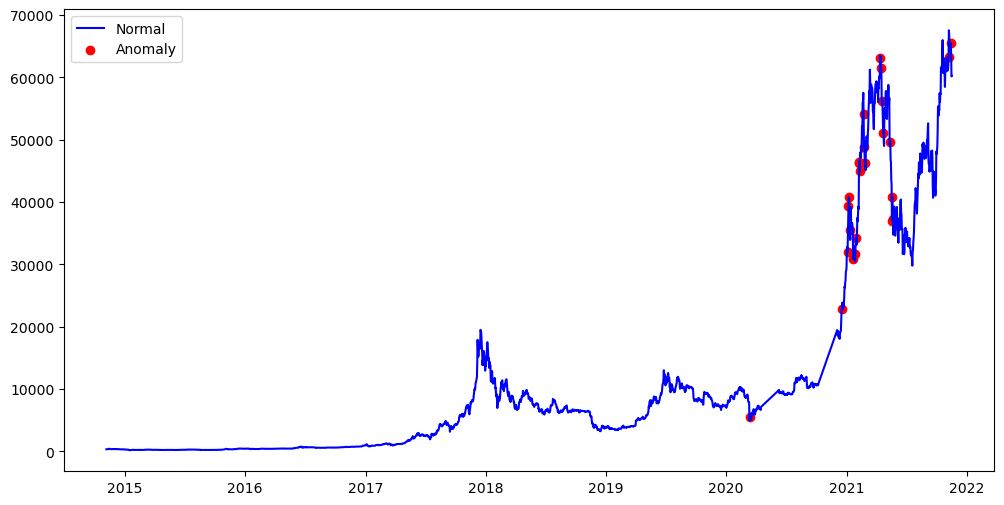

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], color='blue', label='Normal')
plt.scatter(df[df['anomaly']==1]['date'], df[df['anomaly']==1]['close'], color='red', label='Anomaly')
plt.legend()
plt.show()

Bitcoin price data with identified anomalies.

Image Description:

The image displays a time series plot of Bitcoin prices with anomalies highlighted.

X-axis: Represents time, spanning from approximately 2015 to 2022.
Y-axis: Represents the price of Bitcoin.
Blue Line: Represents the "Normal" Bitcoin price trend.
Red Dots: Represent "Anomaly" points, indicating instances where the price behavior is considered unusual or deviates significantly from the expected pattern.
Analysis:

Here's a detailed breakdown of the key observations and insights:

Overall Price Trend:

The blue line clearly shows the overall upward trend in Bitcoin's price over the period, with significant price increases, particularly in 2017-2018 and again in 2020-2021.
Anomaly Distribution:

The red anomaly dots are not evenly distributed across the time period. They are concentrated primarily in the later years (2020-2021), especially during periods of rapid price increase and near price peaks.
There's only one anomaly point identified in the earlier years (around 2020).
Anomaly Characteristics:

The anomalies generally appear to be located at points of sharp price changes or near local price peaks. This suggests that the anomaly detection method is identifying instances of unusually rapid price movements or potential turning points in the price trend.
Absence of Anomalies in Early Years:

The absence of anomalies in the early years might indicate that the price movements during that period were considered "normal" or within the expected range, even though there was some volatility.
Implications and Insights:

Volatility Detection: The anomaly detection method seems to be sensitive to price volatility and rapid changes in price.
Market Events: The concentration of anomalies in 2020-2021 might correlate with specific market events, news, or changes in investor sentiment that caused unusual price behavior.
Trading Signals: In a real-time trading scenario, these anomaly points could potentially serve as warning signals for traders, indicating a need for caution or further investigation.
Model Limitations: The anomaly detection method might have limitations in capturing more subtle anomalies or anomalies in periods of relatively stable prices.
Further Investigation: Understanding the specific algorithm or method used for anomaly detection is crucial for interpreting the results.


Project Summary

Project Summary: Bitcoin Data Analysis

This project involved a detailed analysis of Bitcoin price and volume data, using various visualizations to understand its characteristics, trends, and patterns.

1. Data Distribution Analysis (Histograms):

We examined the distributions of opening, closing, high, and low prices.
Key Finding: All price distributions exhibited a strong right skew, indicating that most price occurrences were at lower levels, with less frequent but significant price increases over time. This suggests an overall upward trend with volatility.
We also analyzed the volume distribution, which showed an extreme right skew, with most trading volume being low and only occasional spikes of high volume. This points to periods of illiquidity and event-driven trading activity.
2. Correlation Analysis (Correlation Matrix):

We analyzed the correlation between opening, closing, high, low prices, and volume.
Key Finding: Price variables were perfectly correlated with each other, suggesting redundancy for some modeling purposes. Volume showed a moderate to strong positive correlation with price, indicating that volume tends to increase with price increases.
3. Time Series Decomposition:

We decomposed the closing price time series into trend, seasonal, and residual components.
Key Finding: The analysis revealed a strong upward trend, particularly in later years, and recurring seasonal patterns. However, significant residuals, especially during periods of rapid price change, indicated that the model didn't fully capture all price dynamics.
4. Volatility Analysis:

We analyzed the 30-day rolling volatility of Bitcoin.
Key Finding: Volatility varied over time, with a notable spike around 2021, highlighting periods of increased risk and price unpredictability.
5. Candlestick Chart Analysis:

We examined a candlestick chart to visualize price movements and volume over a shorter period.
Key Finding: The chart showed an overall upward trend with specific periods of consolidation and strong bullish movement, with volume generally supporting the price trend.
6. Price Forecasting (Prophet and Random Forest):

We analyzed Bitcoin price forecasts generated using Prophet and Random Forest models.
Key Finding:
Prophet captured the general upward trend but tended to smooth out short-term volatility.
Random Forest performed poorly in capturing price dynamics, especially during volatile periods.
7. Anomaly Detection:

We identified anomalies in Bitcoin price data.
Key Finding: Anomalies were concentrated during periods of rapid price changes and near price peaks, suggesting that the anomaly detection method was sensitive to volatility and potential turning points.
Overall Project Significance:

This project provides a comprehensive overview of Bitcoin price and volume data analysis, covering various aspects from basic distributions to advanced modeling and anomaly detection. The insights gained from this analysis can be valuable for traders, investors, analysts, and anyone interested in understanding the complex dynamics of the cryptocurrency market.

Key Takeaways:

Bitcoin prices exhibit an overall upward trend but are characterized by high volatility.
Trading volume is highly variable and often concentrated in short periods.
Accurate price forecasting is challenging, especially during volatile periods.
Identifying anomalies can be crucial for risk management and understanding market behavior.
